In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [3]:
csv_file = "QITS-2021-1-EN-20220624T010716.csv"
df = pd.read_csv(csv_file)
df

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,Value
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,7.314492e+07
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,7.148306e+07
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,6.789742e+07
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,6.111475e+07
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,5.473024e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42952,LVA,Latvia,IMP,Imports,SAU,Saudi Arabia,A,Annual,2019,2019,USD,US Dollar,1.693470e+05
42953,LVA,Latvia,IMP,Imports,SAU,Saudi Arabia,A,Annual,2020,2020,USD,US Dollar,7.626500e+04
42954,LVA,Latvia,IMP,Imports,G-20,G20,A,Annual,2019,2019,USD,US Dollar,1.810599e+10
42955,LVA,Latvia,IMP,Imports,G-20,G20,A,Annual,2020,2020,USD,US Dollar,1.600864e+10


In [4]:
# Separate import and export data
import_df = df[df['FLOW'] == 'IMP']  # Import data
export_df = df[df['FLOW'] == 'EXP']  # Export data

# Filter out "World" entries
import_df = import_df[(import_df['Partner country'] != 'World') \
                      & (import_df['Partner country'] != 'OECD - Total') \
                     & (import_df['Partner country'] != 'G20') \
                     & (import_df['Partner country'] != 'G7')]
export_df = export_df[(export_df['Partner country'] != 'World') \
                      & (export_df['Partner country'] != 'OECD - Total') \
                     & (export_df['Partner country'] != 'G20') \
                     & (export_df['Partner country'] != 'G7')]

In [5]:
import_df
export_df

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,Value
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,7.314492e+07
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,7.148306e+07
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,6.789742e+07
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,6.111475e+07
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,5.473024e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42669,EU28,European Union (28 countries),EXP,Exports,ZAF,South Africa,A,Annual,2016,2016,USD,US Dollar,2.716266e+10
42670,EU28,European Union (28 countries),EXP,Exports,ZAF,South Africa,A,Annual,2017,2017,USD,US Dollar,2.731378e+10
42671,EU28,European Union (28 countries),EXP,Exports,ZAF,South Africa,A,Annual,2018,2018,USD,US Dollar,2.787995e+10
42672,EU28,European Union (28 countries),EXP,Exports,ZAF,South Africa,A,Annual,2019,2019,USD,US Dollar,2.770596e+10


In [6]:
def find_biggest_partner(data):
    return data.groupby('LOCATION')['Value'].idxmax()

biggest_import_partners = import_df.loc[find_biggest_partner(import_df)]
biggest_export_partners = export_df.loc[find_biggest_partner(export_df)]

In [7]:
biggest_import_partners

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,Value
15510,AUS,Australia,IMP,Imports,CHN,China (People's Republic of),A,Annual,2020,2020,USD,US Dollar,6.126254e+10
15646,AUT,Austria,IMP,Imports,DEU,Germany,A,Annual,2011,2011,USD,US Dollar,7.682657e+10
16062,BEL,Belgium,IMP,Imports,NLD,Netherlands,A,Annual,2011,2011,USD,US Dollar,9.123837e+10
36751,BRA,Brazil,IMP,Imports,CHN,China (People's Republic of),A,Annual,2019,2019,USD,US Dollar,3.746379e+10
16656,CAN,Canada,IMP,Imports,USA,United States,A,Annual,2014,2014,USD,US Dollar,2.513290e+11
26820,CHE,Switzerland,IMP,Imports,DEU,Germany,A,Annual,2011,2011,USD,US Dollar,6.670406e+10
28943,CHL,Chile,IMP,Imports,USA,United States,A,Annual,2012,2012,USD,US Dollar,1.859333e+10
39012,CHN,China (People's Republic of),IMP,Imports,JPN,Japan,A,Annual,2011,2011,USD,US Dollar,1.947050e+11
38894,COL,Colombia,IMP,Imports,USA,United States,A,Annual,2014,2014,USD,US Dollar,1.825628e+10
16883,CZE,Czech Republic,IMP,Imports,DEU,Germany,A,Annual,2018,2018,USD,US Dollar,4.540558e+10


In [8]:
biggest_export_partners

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,Value
328,AUS,Australia,EXP,Exports,CHN,China (People's Republic of),A,Annual,2019,2019,USD,US Dollar,1.029810e+11
465,AUT,Austria,EXP,Exports,DEU,Germany,A,Annual,2011,2011,USD,US Dollar,5.367960e+10
772,BEL,Belgium,EXP,Exports,DEU,Germany,A,Annual,2011,2011,USD,US Dollar,8.631725e+10
36180,BRA,Brazil,EXP,Exports,CHN,China (People's Republic of),A,Annual,2020,2020,USD,US Dollar,6.778808e+10
1467,CAN,Canada,EXP,Exports,USA,United States,A,Annual,2014,2014,USD,US Dollar,3.635520e+11
11796,CHE,Switzerland,EXP,Exports,USA,United States,A,Annual,2020,2020,USD,US Dollar,7.279708e+10
13684,CHL,Chile,EXP,Exports,CHN,China (People's Republic of),A,Annual,2020,2020,USD,US Dollar,2.854965e+10
34725,CHN,China (People's Republic of),EXP,Exports,USA,United States,A,Annual,2017,2017,USD,US Dollar,4.303280e+11
38201,COL,Colombia,EXP,Exports,USA,United States,A,Annual,2014,2014,USD,US Dollar,1.447070e+10
1694,CZE,Czech Republic,EXP,Exports,DEU,Germany,A,Annual,2018,2018,USD,US Dollar,6.495636e+10


In [9]:
# world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world_map = gpd.read_file("ne_10m_admin_0_countries.shx")

In [10]:
# geoplot.polyplot(world, figsize=(8, 4))

In [11]:
# Load the shapefile
world_map = gpd.read_file("ne_10m_admin_0_countries.dbf")

# Print the column names
print(world_map.columns)

# Load the shapefile with 'SOV_A3' as the index using Geopandas
world_map = gpd.read_file("ne_10m_admin_0_countries.dbf", index_col='SOV_A3')

# Inner join the world map with the biggest import and export partner data
import_map = world_map.join(biggest_import_partners.set_index('LOCATION'), on='SOV_A3')
export_map = world_map.join(biggest_export_partners.set_index('LOCATION'), on='SOV_A3')

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [12]:
# world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# print(world_map.columns)

In [67]:
# Inner join the world map with the biggest import and export partner data
# import_map = world_map.set_index('iso_a3').join(biggest_import_partners.set_index('PARTNER'), how='inner')
# export_map = world_map.set_index('iso_a3').join(biggest_export_partners.set_index('PARTNER'), how='inner')
# import_map = world_map.join(biggest_import_partners.set_index('PARTNER'), how='inner')
# export_map = world_map.join(biggest_export_partners.set_index('PARTNER'), how='inner')

In [13]:
import_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,Value
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,Imports,CHN,China (People's Republic of),A,Annual,2017.0,2017.0,USD,US Dollar,3.452073e+10
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,Imports,USA,United States,A,Annual,2012.0,2012.0,USD,US Dollar,1.859333e+10
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


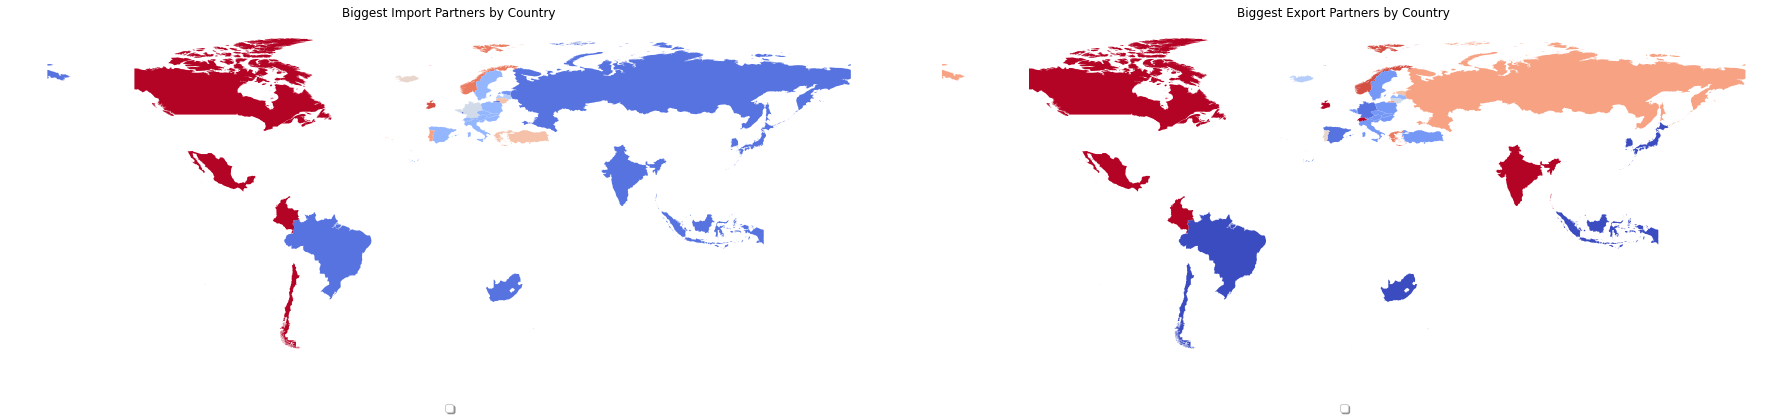

In [17]:
# Create two separate world maps for import and export
fig, axes = plt.subplots(1, 2, figsize=(25, 16))
# Import map
import_map.plot(column='Partner country', cmap='coolwarm', linewidth=0.8, ax=axes[0], legend=True)
axes[0].set_title('Biggest Import Partners by Country')
axes[0].set_axis_off()
# Export map
export_map.plot(column='Partner country', cmap='coolwarm', linewidth=0.8, ax=axes[1], legend=True)
axes[1].set_title('Biggest Export Partners by Country')
axes[1].set_axis_off()
# For the import map legend
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)

# For the export map legend
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1728x1152 with 0 Axes>

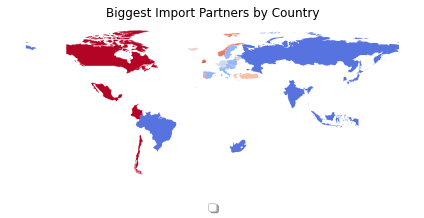

In [20]:
# Plot the import map
plt.figure(figsize=(24, 16))  # Adjust the figure size
import_map.plot(column='Partner country', cmap='coolwarm', linewidth=0.8, legend=True)
plt.title('Biggest Import Partners by Country')
plt.axis('off')
plt.tight_layout()  # Ensure proper spacing
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2520x720 with 0 Axes>

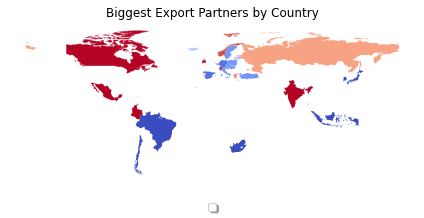

In [21]:
# Plot the export map
plt.figure(figsize=(35, 10))
export_map.plot(column='Partner country', cmap='coolwarm', linewidth=0.8, legend=True)
plt.title('Biggest Export Partners by Country')
plt.axis('off')
plt.tight_layout()
plt.show()